# Lab-4: Frequency Mixer 
### ------------------------------
#### To study frequency Up-conversion and Down-conversion.
#### Estimation of 1 dB compression point.
#### Dynamic range of the mixer
### -------------------------------
### Name: Manish Kumar (S. No.- 21044)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Case-I: Up-conversion
### Local oscillator: Power = 10 dBm (provided by manufacturer) and frequency = 0.1 GHz 
### Intermediate frequency = 5 GHz
### Radio frequency = 5.1 GHz
## Below is a schematics of frequency upconversion

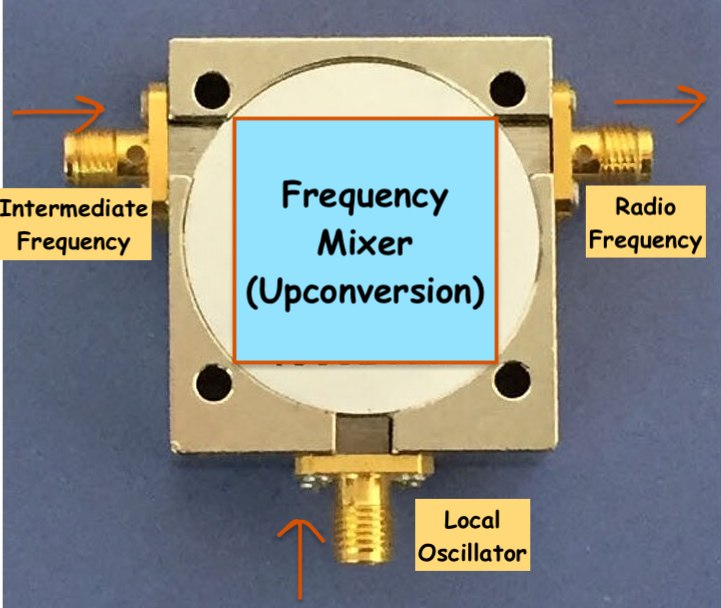

In [2]:
mixer = pd.read_excel('MIXER-expt4-30_9.xlsx')

In [3]:
mixer

,Upconversion,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Vif(dBM),Vrf dBm at 5.1 GHz,NaN
1,NaN,-30,-35,NaN
2,NaN,-28,-34,NaN
3,NaN,-26,-32,NaN
4,NaN,-24,-30,NaN
5,NaN,-22,-28,NaN
6,NaN,-20,-26,NaN
7,NaN,-18,-24,NaN
8,NaN,-16,-22,NaN
9,NaN,-14,-20,NaN


In [4]:
# some data cleaning is required...

In [5]:
mixer=mixer.drop(0)

In [6]:
mixer=mixer.drop(['Upconversion'], axis=1)

In [7]:
mixer

,Unnamed: 1,Unnamed: 2,Unnamed: 3
1,-30,-35,NaN
2,-28,-34,NaN
3,-26,-32,NaN
4,-24,-30,NaN
5,-22,-28,NaN
6,-20,-26,NaN
7,-18,-24,NaN
8,-16,-22,NaN
9,-14,-20,NaN
10,-12,-18,NaN


In [8]:
mixer.columns=['V_IF', 'V_RF','k']

In [9]:
mixer

,V_IF,V_RF,k
1,-30,-35,NaN
2,-28,-34,NaN
3,-26,-32,NaN
4,-24,-30,NaN
5,-22,-28,NaN
6,-20,-26,NaN
7,-18,-24,NaN
8,-16,-22,NaN
9,-14,-20,NaN
10,-12,-18,NaN


In [10]:
mixer.drop(['k'], axis=1)

,V_IF,V_RF
1,-30,-35
2,-28,-34
3,-26,-32
4,-24,-30
5,-22,-28
6,-20,-26
7,-18,-24
8,-16,-22
9,-14,-20
10,-12,-18


In [11]:
# Now we can analyse the data to find the relevant quantities...

Text(0, 0.5, 'V_RF (dBm)')

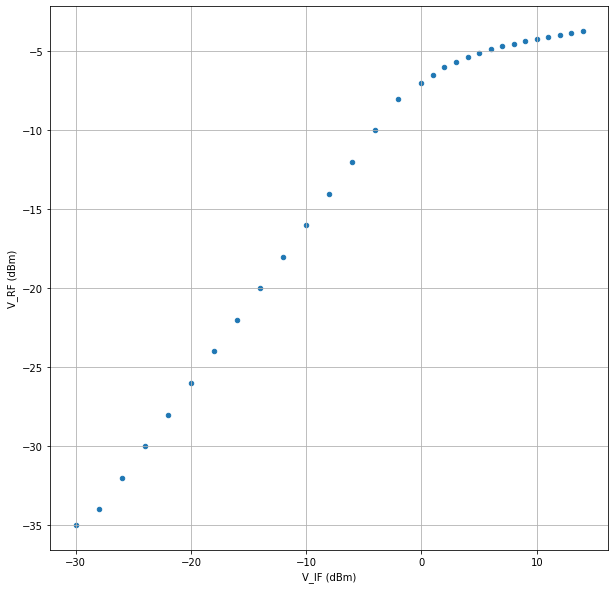

In [12]:
# Graph of V_IF and V_RF
mixer.plot(x='V_IF', y=['V_RF'], figsize=(10,10), grid=True, kind='scatter')
plt.xlabel("V_IF (dBm)")
plt.ylabel("V_RF (dBm)")

### We will detrmine the range of linear behaviour of the graph. 
### Then we will proceed to determine 1DB compression point.

### Between $V_{IF}= -10\ dBm$ and $-20\ dBm$, the graph is almost linear.
### The equation of the straight line will be: $y-(-26) = \frac{-26 -(-16)}{-20 -(-10)}(x-(-20))$

In [13]:
V_IF = mixer['V_IF']
V_RF = mixer['V_RF']

In [14]:
# Constructing the straight line for reference
x1=V_IF # X- axis points for the straight line

In [15]:
y1 = -6 + x1 #Y- axis points for the straight line

Text(0, 0.5, 'V_RF (dBm)')

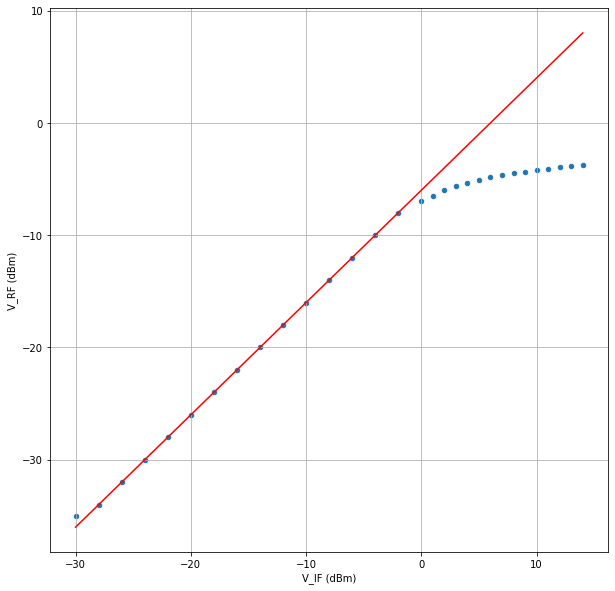

In [16]:
# plotting the staright line on the V_IF vs V_RF
mixer.plot(x='V_IF', y=['V_RF'], figsize=(10,10), grid=True, kind='scatter')
plt.plot (x1,y1, 'r-')
plt.xlabel("V_IF (dBm)")
plt.ylabel("V_RF (dBm)")

## 1 dB compression point:  
### It is the point at which deviation of measured $V_{RF}$ of the mixer from the straight line is 1 dBm.

In [17]:
V_RF

1      -35
2      -34
3      -32
4      -30
5      -28
6      -26
7      -24
8      -22
9      -20
10     -18
11     -16
12     -14
13     -12
14     -10
15      -8
16      -7
17    -6.5
18      -6
19   -5.65
20   -5.34
21   -5.08
22   -4.86
23   -4.67
24    -4.5
25   -4.35
26    -4.2
27   -4.08
28   -3.95
29   -3.83
30   -3.71
Name: V_RF, dtype: object

In [18]:
y1

1     -36
2     -34
3     -32
4     -30
5     -28
6     -26
7     -24
8     -22
9     -20
10    -18
11    -16
12    -14
13    -12
14    -10
15     -8
16     -6
17     -5
18     -4
19     -3
20     -2
21     -1
22      0
23      1
24      2
25      3
26      4
27      5
28      6
29      7
30      8
Name: V_IF, dtype: object

In [19]:
# Searching 1 dB compression point in the list...

for i in range(1,len(x1)):
    if (y1[i] - V_RF[i])== 1:
        print("1 dB compression point is:",V_IF[i])
        print("The index in the list at which this occur:",i)

1 dB compression point is: 0
The index in the list at which this occur: 16


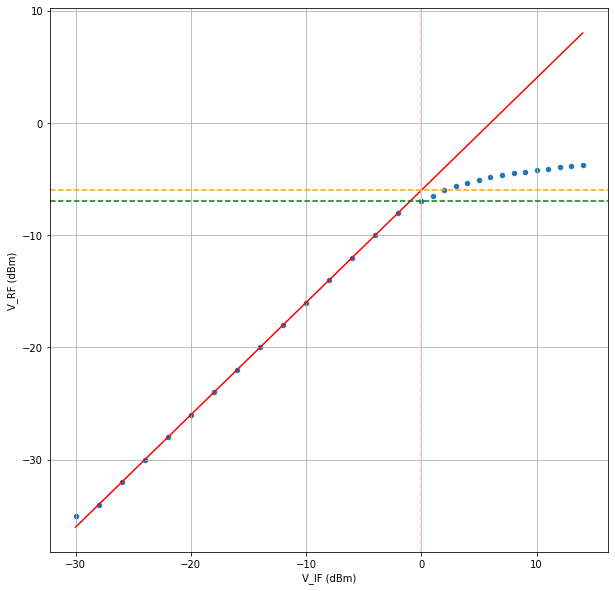

In [20]:
# Estimating the 1 dB compression point on the graph
mixer.plot(x='V_IF', y=['V_RF'], figsize=(10,10), grid=True, kind='scatter')
plt.plot (x1,y1, 'r-')
plt.xlabel("V_IF (dBm)")
plt.ylabel("V_RF (dBm)")
# for marking the compression point on the graph. Dashed lines.
plt.axvline(x=0, color='pink', linestyle='--')
plt.axhline(y=-6, color='orange', linestyle='--')
plt.axhline(y=-7, color='green', linestyle='--')

### Dynamic range of the Mixer:
### The voltage upto which the deviation is less than 1dB
### Their is slight deviation at the starting of the curve. If we exclude that part then the dynamic range would be as follow:-

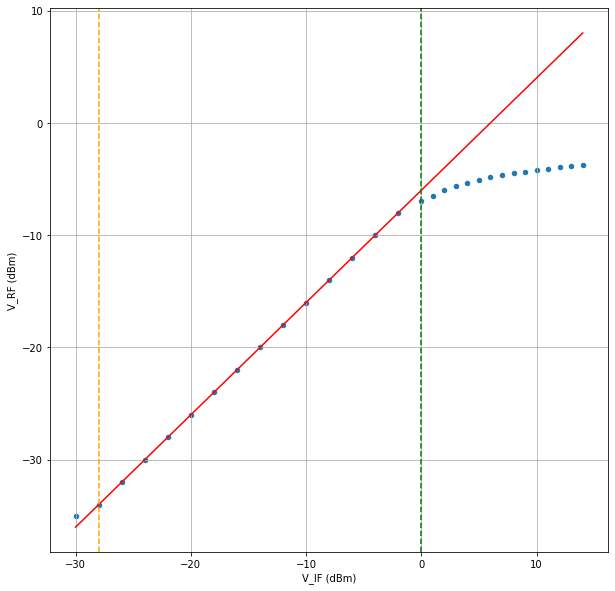

In [21]:
# Dynamic range of the Mixer
mixer.plot(x='V_IF', y=['V_RF'], figsize=(10,10), grid=True, kind='scatter')
plt.plot (x1,y1, 'r-')
plt.xlabel("V_IF (dBm)")
plt.ylabel("V_RF (dBm)")
# for marking the Dynamic range on the graph. Dashed lines.
plt.axvline(x=0, color='green', linestyle='--')
plt.axvline(x=-28, color='orange', linestyle='--')

In [22]:
# Welcome to the world of Emoji in Jyupter Notebook.

In [23]:
pip install emoji --upgrade

     |████████████████████████████████| 240 kB 1.9 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234906 sha256=c9da73470936178524bf568502b42d51295d2cf06f39c73a0bac034751672205
  Stored in directory: /Users/manishkumar/Library/Caches/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.1.0
    Uninstalling emoji-2.1.0:
      Successfully uninstalled emoji-2.1.0
Note: you may need to restart the kernel to use updated packages.


In [24]:
import emoji

In [25]:
emoji.emojize('It works!!! :thumbs_up:')

'It works!!! 👍'